In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [101]:
data = pd.read_csv('/content/drive/My Drive/data/viettri_quality.csv', index_col='date')

In [102]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,44,17,29,2,9,4
3/2/2019,65,37,27,4,12,4
3/3/2019,81,38,2,1,1,2
3/4/2019,51,24,21,4,8,1
3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...
5/28/2024,38,24,35,1,15,5
5/29/2024,38,17,41,7,15,10
5/30/2024,28,8,11,1,15,1


In [103]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [104]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [106]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               1408      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0260 - val_loss: 0.0139
Epoch 2/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0209 - val_loss: 0.0132
Epoch 3/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0203 - val_loss: 0.0158
Epoch 4/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0199 - val_loss: 0.0157
Epoch 5/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0197 - val_loss: 0.0137
Epoch 6/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0131
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0133
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0130
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0143
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0133

In [108]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.20903955 0.20903955 0.15254237 0.06214689 0.11299435]
Predict value:
6/6 [==============================] - 0s 2ms/step
[[0.37848637]
 [0.4302064 ]
 [0.37283897]
 [0.3532659 ]
 [0.4022784 ]
 [0.43822557]
 [0.5501988 ]
 [0.51737624]
 [0.32538345]
 [0.27076307]
 [0.36600918]
 [0.17182413]
 [0.08083135]
 [0.2778461 ]
 [0.22559151]
 [0.2849818 ]
 [0.40454572]
 [0.3887402 ]
 [0.4160699 ]
 [0.34928605]
 [0.34231094]
 [0.35859168]
 [0.28143585]
 [0.2983195 ]
 [0.23976925]
 [0.20642781]
 [0.20266095]
 [0.14812127]
 [0.2707208 ]
 [0.29559538]
 [0.2875523 ]
 [0.274491  ]
 [0.27009213]
 [0.34258157]
 [0.4049082 ]
 [0.3283057 ]
 [0.37023857]
 [0.36622694]
 [0.31252286]
 [0.3618923 ]
 [0.36099198]
 [0.20948744]
 [0.31959328]
 [0.31004402]
 [0.26377264]
 [0.36313653]
 [0.31991807]
 [0.25187376]
 [0.16533399]
 [0.18997225]
 [0.06835049]
 [0.16001841]
 [0.2197981 ]
 [0.32604453]
 [0.25087038]
 [0.19672103]
 [0.20840105]
 [0.2730234 ]
 [0.15804142]
 [0.20844838]
 [0.16484824]
 [0.05541

In [109]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 1ms/step


0.23049747670669438

In [110]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.09172102763555985
MAPE: 12015550584092.691
MAE: 0.06584618570544819


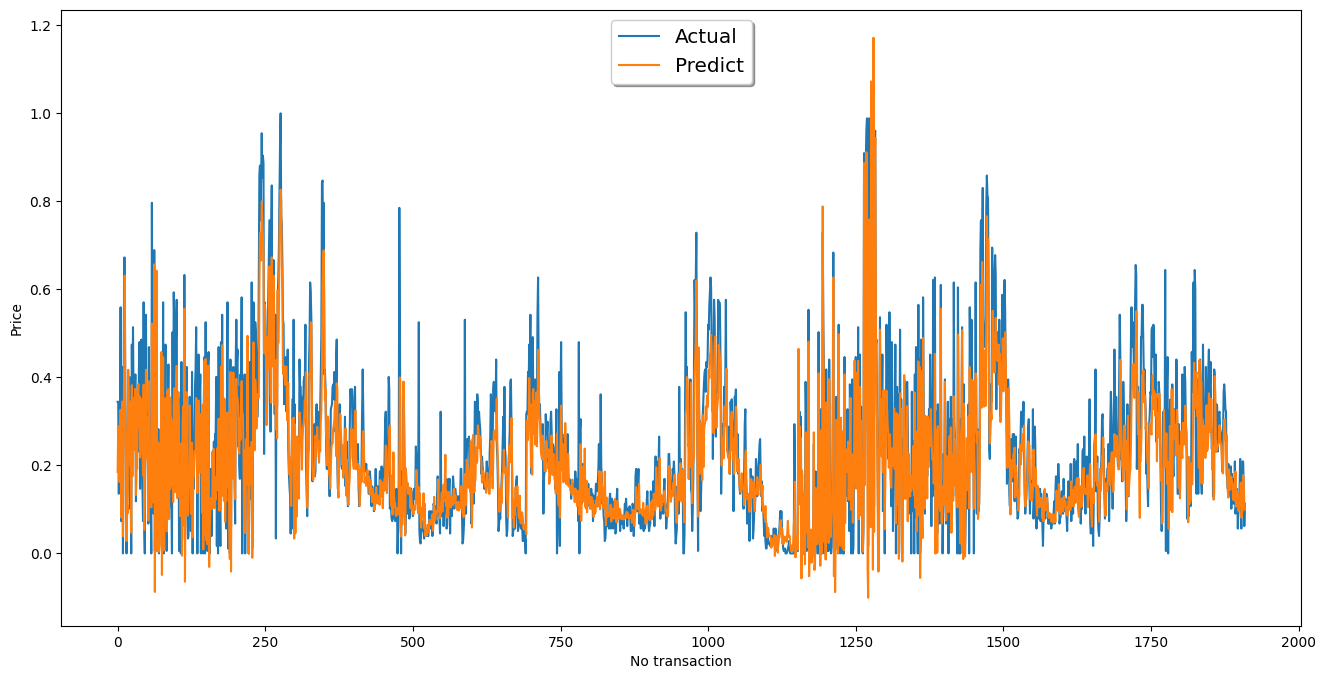

In [112]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [113]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 21ms/step
Next 90 days PM2.5 predictions: [18.646614  22.039513  25.411448  23.195585  21.555525  21.701595
 23.536652  19.429203  18.396488  17.436962  16.060776  16.364796
 16.166016  15.719037  15.64907   15.473011  15.111341  14.954395
 14.4602    13.86974   13.650199  13.484896  13.448795  13.571239
 13.592308  13.624225  13.84513   13.94754   13.958829  14.025223
 13.9904175 13.975622  14.02981   13.968887  13.889964  13.904233
 13.888499  13.877953  13.905222  13.868748  13.858499  13.911834
 13.912477  13.900264  13.914485  13.900994  13.905894  13.932491
 13.910799  13.89387   13.90957   13.905746  13.905657  13.912947
 13.8961315 13.895404  13.913571  13.907933  13.902291  13.906876
 13.901295  13.905649  13.91412   13.904078  13.900603  13.907829
 13.905965  13.906518  13.908242  13.901627  13.903365  13.909658
 13.905955  13.904244  13.9059305 13.90394   13.906294  13.908526
 13.904138  13.903919  13.906796  13.905748  13.906088  13

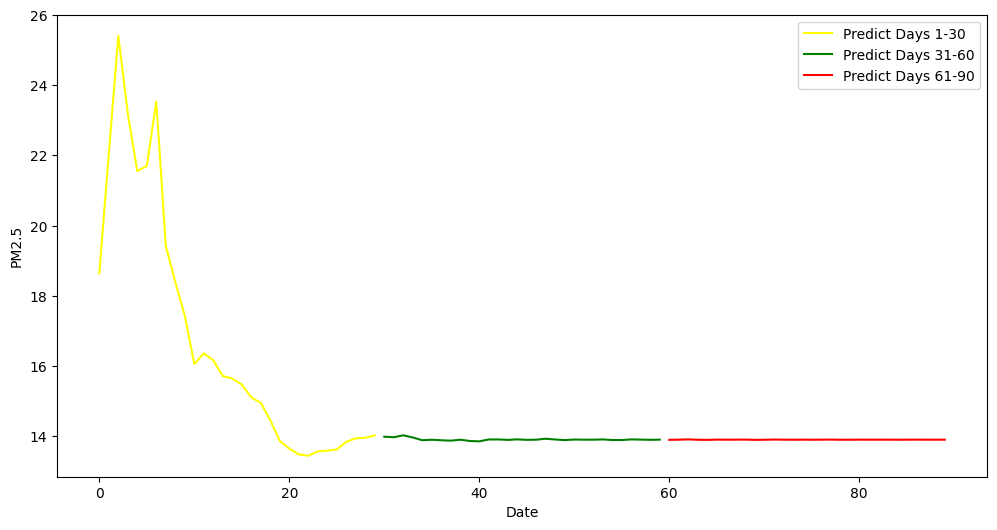

In [114]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()